In [35]:
import esm4ppe
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr

In [36]:
variables = ['intpp','no3os','po4os','dfeos']
vs = xr.Dataset()
for variable in variables:
    es = esm4ppe.esm4ppeObj(variable,'monthly')
    tmp = es.verify('ppp',groupby='month')[variable]
    tmp = tmp.where(tmp>0,0)
    vs[variable] = tmp

Opening static... static opened.
Opening skill metric.
Opening static... static opened.
Opening skill metric.
Opening static... static opened.
Opening skill metric.
Opening static... static opened.
Opening skill metric.


### Time-series

In [38]:
ds = (vs
      .where(es.static['geolat']<-55)
      .sel(month=1)
      .weighted(es.static['areacello'].fillna(0))
      .mean(['xh','yh']))

In [ ]:
for variable in variables:
    ds[variable].plot(label=variable)
plt.legend()

In [21]:
def plot_PolarStereographic(pole,**kwargs):
    
    crsP = kwargs['projection']

    mult = kwargs['mult']
    fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':crsP})

    ax.add_feature(cfeature.LAND,facecolor='darkgray')
    ax.set_extent([-180, 180, mult*90, mult*50], ccrs.PlateCarree())

    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    
    return fig,ax

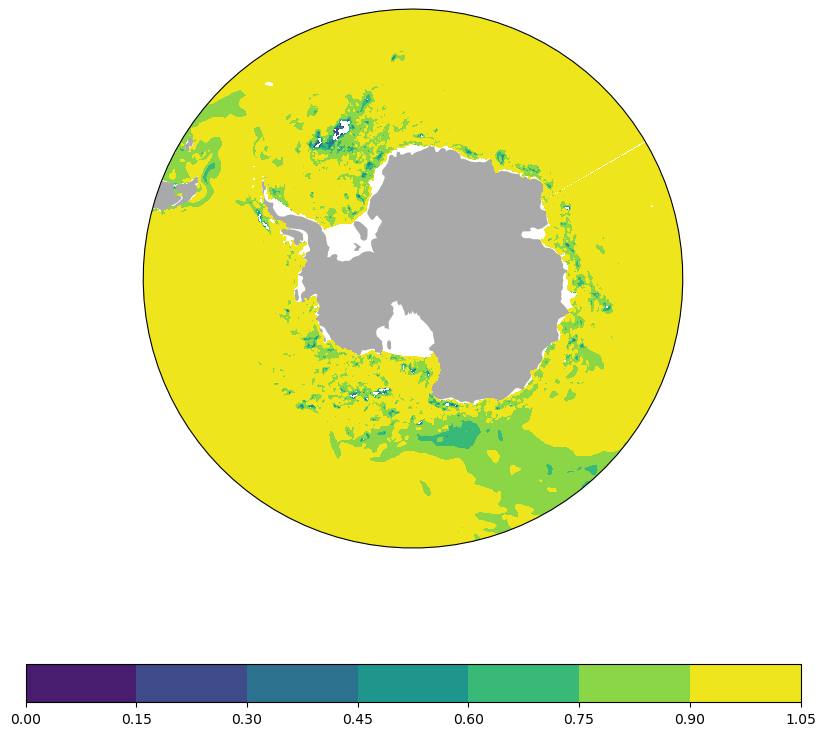

In [30]:
kwargs = {'mult':-1,'projection':ccrs.SouthPolarStereo()}
fig,ax = plot_PolarStereographic('south',**kwargs)
im = ax.contourf(es.static['geolon'],es.static['geolat'],
            vs['dfeos'].isel(lead=0,month=0),
            transform=ccrs.PlateCarree())
im.set_clim([0,1])
plt.colorbar(im,ax=ax,orientation='horizontal')

In [24]:
vs

<xarray.Dataset>
Dimensions:  (lead: 120, xh: 720, yh: 576, month: 4)
Coordinates:
  * lead     (lead) int64 1 2 3 4 5 6 7 8 9 ... 113 114 115 116 117 118 119 120
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * month    (month) int64 1 4 7 10
Data variables:
    dfeos    (month, lead, yh, xh) float32 ...